### 고찰
- 팰린드롬의 구간을 크게 잡을수록 항상 더 적게 분할이 가능한걸까?
  - 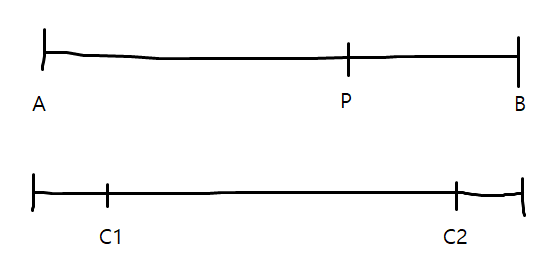
  - 예를들어, $\overline{AP}$와 $\overline{PB}$이 팰린드롬이고, 이게 최소로 분리할 수 있는 경우라고 하자.
  - 이 사이 구간에 $AP$나 $PB$보다 긴 구간 $\overline{C1C2}$도 팰린드롬이고, 이게 가능한 최대길이의 팰린드롬이라고 하자.
  - 만약 그러한 경우가 $\overline{AB}$가 팰린드롬, 즉 가정에서 모순이 일어나는게 아닌 이상, 그러한 점 $C1$과 $C2$은 존재하지 않는다고 한다면 그냥 구간마다 긴 팰린드롬을 찾기만 하면 될 것 같다.
  - 나중에 증명해보자..

### 풀이
- `P[A][B]`에 대해 [A:B] 구간이 팰린드롬인지 여부를 판단하는 DP를 구성한다.
  - 이미 10942에서 팰린드롬을 판단하는 구현을 한적이 있기 때문에 자세히 적지는 않는다.
- 이후 1 ~ N개(e)의 문자열을 살펴보면서 `DP[X] = X번째 문자열까지 팰린드롬 최소분할 횟수`를 갱신한다.
  - 문자열의 어떤 구간 `S[A:B]`가 팰린드롬이면 가능한 최소값인 1이 된다.
    - `S[0:X]` 까지 전부 팰린드롬일 수 있으므로 먼저 체크해준다.
  - 길이 e인 문자열 `S`를 최소 개수, 즉 2개로 분리하는 경우의 수는 `S[0:0] / S[1:e], S[0:1] / S[2:e], S[0:2] / S[3:e], ..., S[0:e-1] / S[e:e]` 일 것이다. (단 `[start, end]`)
    - 즉 분할점인 `m`이 `1`에서 `e-1`까지 이동하는 방식이라고 직관적으로 생각할 수 있다.
    - 분할됐을 때 왼쪽 구간을 DP[X]라고 본다면 DP를 Bottom-Up으로 채워나갈 수 있다.
    - 오른쪽 구간이 팰린드롬이면 최소값인 1이 될 수 있으므로, X번째까지의 문자열에 대해 `왼쪽 구간(= DP[m]) + 오른쪽 구간의 팰린드롬 여부(= P[m+1][X])`를 계산해서 최소값을 갱신하면 된다.
  - DP[X] = `min(DP[X], DP[m+1] + 1)`

In [ ]:
S = input()
n = len(S)
P = [[0] * n for _ in range(n)] #P[e][e] = i부터 j까지 팰린드롬 여부

for e in range(n-1) :
  P[e][e] = 1 #문자열의 길이가 1이면 팰린드롬이다
  if S[e] != S[e+1] : continue #문자열의 길이가 2이면 두 문자가 같을 때 팰린드롬이다.
  P[e][e+1] = 1
P[n-1][n-1] = 1

for d in range(2, n) :
  for e in range(n-d) :
    if S[e] == S[e+d] and P[e+1][e+d-1] : #첫문자와 끝문자가 같고, 그 사이 구간이 팰린드롬일 때
      P[e][e+d] = 1

MAX = 999999999
DP = [MAX] * n #DP[X] = i까지의 최소 팰린드롬 분할 개수
for X in range(n) :
  if P[0][X] : #0부터 i까지가 팰린드롬이면
    DP[X] = 1
    continue
  for m in range(X) :
    if P[m+1][X] : #m+1부터 e까지가 팰린드롬이면
      DP[X] = min(DP[X], DP[m] + 1)

print(DP[n-1])